In [20]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [21]:
import sklearn
print(sklearn.__version__)

0.23.1


In [22]:
data_df = pd.read_csv("Trucks.csv")

In [23]:
data_df.head()

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0


In [24]:
data_df.tail()

,Unnamed: 0,Freq,period,parked,light,collision
19,20,39,1,1,0,1
20,21,579,0,0,0,0
21,22,494,1,0,0,0
22,23,1018,0,0,0,1
23,24,885,1,0,0,1


In [25]:
data_df.shape

(24, 6)

In [26]:
df=data_df.drop('Unnamed: 0', axis=1)

In [27]:
df

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0
5,2373,1,0,1,0
6,10749,0,0,1,1
7,9768,1,0,1,1
8,634,0,1,0,0
9,411,1,1,0,0


In [29]:
df.describe()

,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1448.916667,0.500000,0.500000,0.333333,0.500000
std,2794.132578,0.510754,0.510754,0.481543,0.510754
min,39.000000,0.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000,0.000000
50%,536.500000,0.500000,0.500000,0.000000,0.500000
75%,994.750000,1.000000,1.000000,1.000000,1.000000
max,10749.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df.dtypes

Freq         int64
period       int64
parked       int64
light        int64
collision    int64
dtype: object

In [33]:
df.isnull().sum()

Freq         0
period       0
parked       0
light        0
collision    0
dtype: int64

In [35]:
df['period'].unique()

array([0, 1], dtype=int64)

In [37]:
df['parked'].unique()

array([1, 0], dtype=int64)

In [39]:
df['light'].unique()

array([1, 0], dtype=int64)

In [41]:
df['collision'].unique()

array([0, 1], dtype=int64)

In [43]:
df['collision']=df['collision'].astype('object')

In [45]:
df.dtypes

Freq          int64
period        int64
parked        int64
light         int64
collision    object
dtype: object

In [47]:
df['collision'].value_counts()

1    12
0    12
Name: collision, dtype: int64

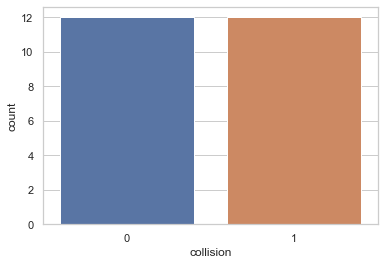

In [50]:
sns.countplot(x='collision', data=df);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


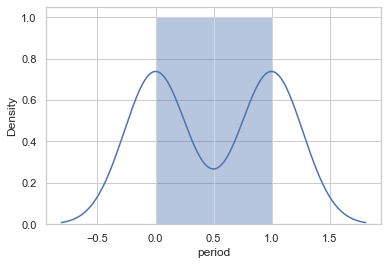

In [55]:
sns.distplot(df['period']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


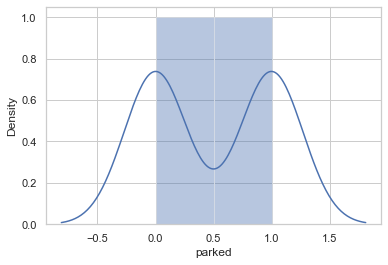

In [57]:
sns.distplot(df['parked']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


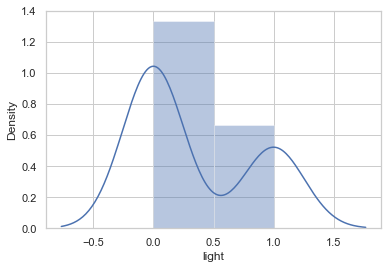

In [59]:
sns.distplot(df['light']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


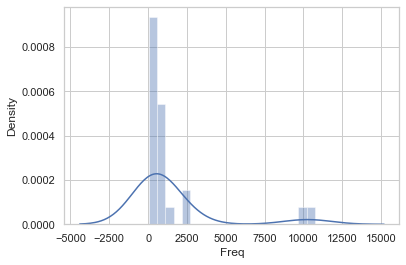

In [62]:
sns.distplot(df['Freq']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

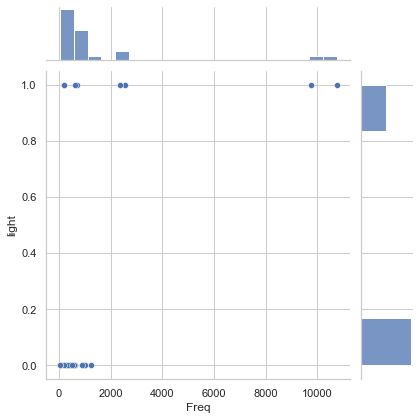

In [68]:
ax=sns.jointplot(df['Freq'], df['light'])
ax.annotate(stats.pearsonr)
 ### annotate function of stats is to print correlation value

In [71]:
df.corr()

,Freq,period,parked,light
Freq,1.000000,-0.034152,-4.230794e-01,5.025354e-01
period,-0.034152,1.000000,0.000000e+00,0.000000e+00
parked,-0.423079,0.000000,1.000000e+00,-2.943923e-17
light,0.502535,0.000000,-2.943923e-17,1.000000e+00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


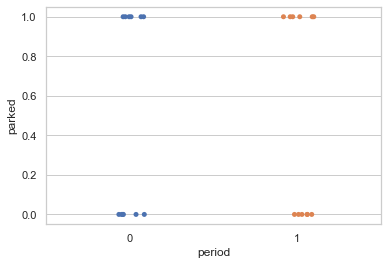

In [76]:
sns.stripplot(df['period'], df['parked']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


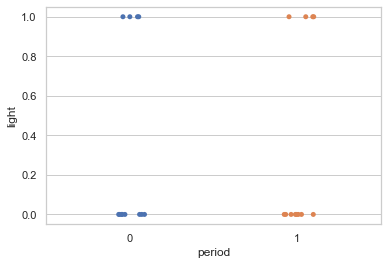

In [78]:
sns.stripplot(df['period'], df['light']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


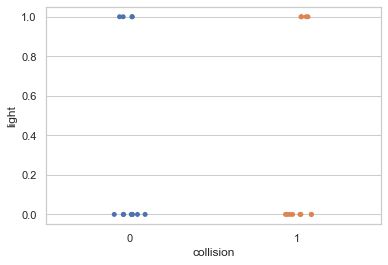

In [79]:
sns.stripplot(df['collision'], df['light']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


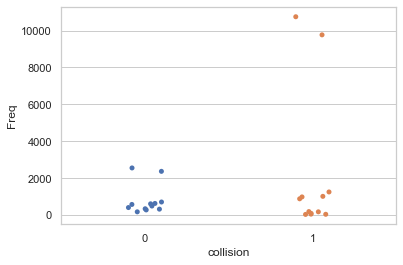

In [80]:
sns.stripplot(df['collision'], df['Freq']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


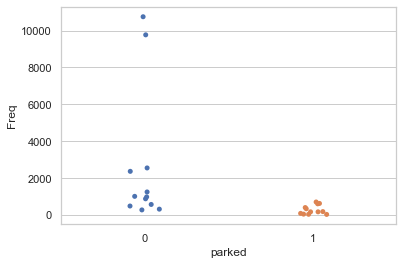

In [82]:
sns.stripplot(df['parked'], df['Freq']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


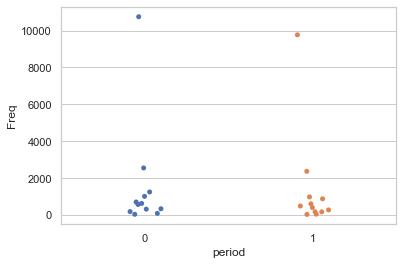

In [84]:
sns.stripplot(df['period'], df['Freq']); ### Concentration of observations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


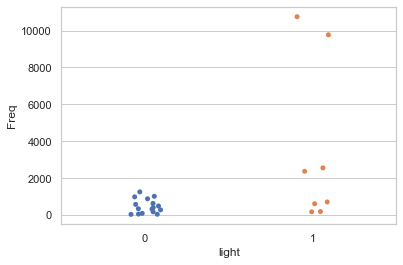

In [90]:
sns.stripplot(df['light'], df['Freq']); ### Concentration of observations

In [103]:
df['collision'].value_counts(normalize=True)

1    0.5
0    0.5
Name: collision, dtype: float64

Text(0, 0.5, 'Light')

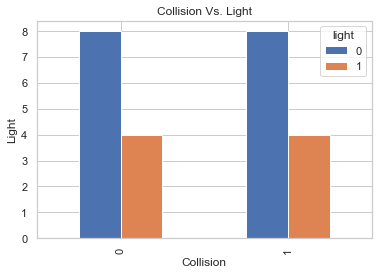

In [107]:
pd.crosstab(df.collision, df.light).plot(kind='bar')
plt.title('Collision Vs. Light')
plt.xlabel('Collision')
plt.ylabel('Light')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Freq       24 non-null     int64 
 1   period     24 non-null     int64 
 2   parked     24 non-null     int64 
 3   light      24 non-null     int64 
 4   collision  24 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [110]:
df.columns

Index(['Freq', 'period', 'parked', 'light', 'collision'], dtype='object')

In [113]:
X = np.asmatrix(df[['Freq', 'period', 'parked', 'light']])
X = scale(X)
Y = np.asarray(data_df[['collision']])

In [114]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [115]:
# Predict it
pred_class = model.predict(X)
df['Prediction'] = pred_class 

In [118]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= df[['Freq', 'period', 'parked', 'light']]
Cor1 = data.corr()
Cor1

,Freq,period,parked,light
Freq,1.000000,-0.034152,-4.230794e-01,5.025354e-01
period,-0.034152,1.000000,0.000000e+00,0.000000e+00
parked,-0.423079,0.000000,1.000000e+00,-2.943923e-17
light,0.502535,0.000000,-2.943923e-17,1.000000e+00


In [119]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)

array([[8, 4],
       [6, 6]], dtype=int64)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



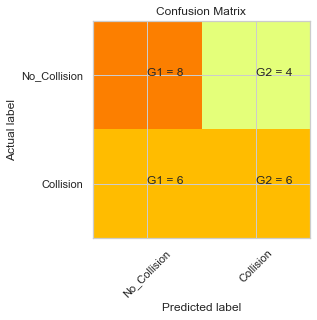

In [122]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y, pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No_Collision', 'Collision']
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [123]:
df.collision.value_counts()

1    12
0    12
Name: collision, dtype: int64

In [126]:
df2=df.groupby(['light'])

In [130]:
df2.head(24)

,Freq,period,parked,light,collision,Prediction
0,712,0,1,1,0,0
1,613,1,1,1,0,0
2,192,0,1,1,1,0
3,179,1,1,1,1,0
4,2557,0,0,1,0,0
5,2373,1,0,1,0,0
6,10749,0,0,1,1,1
7,9768,1,0,1,1,1
8,634,0,1,0,0,1
9,411,1,1,0,0,1


In [138]:
df3=df.groupby('period').groups
df3

{0: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], 1: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]}

In [140]:
df4=df.groupby('collision').groups
df4

{0: [0, 1, 4, 5, 8, 9, 12, 13, 16, 17, 20, 21], 1: [2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 22, 23]}

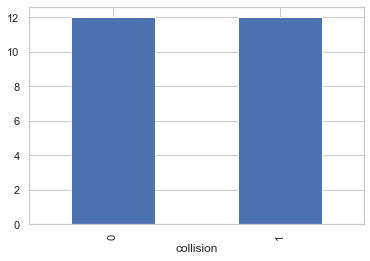

In [142]:
plt.clf()
df.groupby('collision').size().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

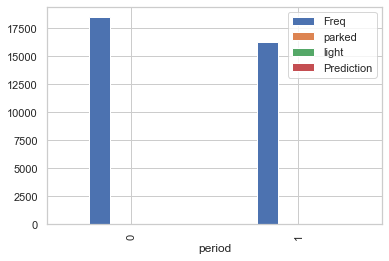

In [147]:
plt.clf()
df.groupby('period').sum().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

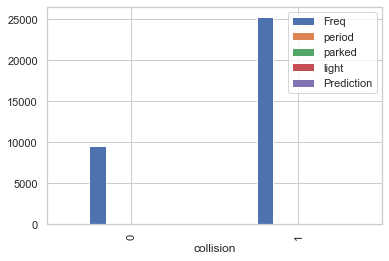

In [149]:
plt.clf()
df.groupby('collision').sum().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

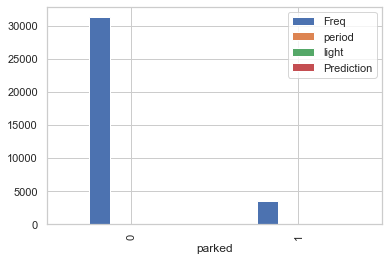

In [150]:
plt.clf()
df.groupby('parked').sum().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

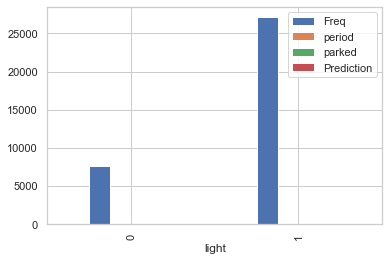

In [151]:
plt.clf()
df.groupby('light').sum().plot(kind='bar')
plt.show()

# Second

In [213]:
df = pd.read_csv("Trucks.csv")

In [214]:
X = np.asmatrix(df[['Freq', 'period', 'parked', 'light']])
Y = np.asarray(df[['collision']])

In [215]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [216]:
# Predict it
pred_class = model.predict(X)
df['Prediction'] = pred_class

In [217]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= df[['Freq', 'period', 'parked', 'light']]
Cor1 = data.corr()
Cor1

,Freq,period,parked,light
Freq,1.000000,-0.034152,-4.230794e-01,5.025354e-01
period,-0.034152,1.000000,0.000000e+00,0.000000e+00
parked,-0.423079,0.000000,1.000000e+00,-2.943923e-17
light,0.502535,0.000000,-2.943923e-17,1.000000e+00


In [218]:
confusion_matrix(Y, pred_class)

array([[8, 4],
       [6, 6]], dtype=int64)

In [219]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



In [220]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.3277777777777777


In [221]:
#define new observation
new = [719, 0, 1, 0]

#predict which class the new observation belongs to
model.predict([new])

array([1], dtype=int64)

Area Under the Curve 0.5833


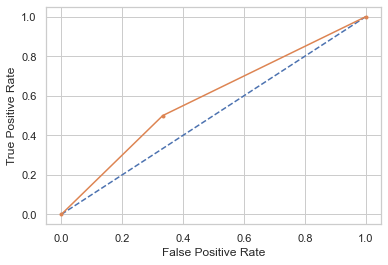

In [222]:
from sklearn import metrics
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y,model.predict(X))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


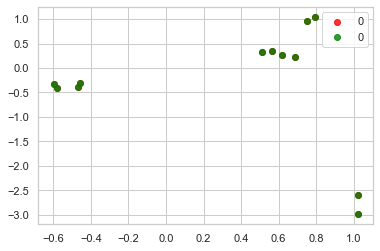

In [196]:
#define data to plot
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, Y).transform(X)
target_names = df.collision

#create LDA plot
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_names in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[Y == 0], data_plot[Y == 1], alpha=.8, color=color,
                label=target_names)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [225]:
df['Freq'].unique()

array([  712,   613,   192,   179,  2557,  2373, 10749,  9768,   634,
         411,    95,    55,   325,   283,  1256,   987,   345,    46,
          39,   579,   494,  1018,   885], dtype=int64)

In [226]:
df['period'].unique()

array([0, 1], dtype=int64)

In [223]:
df['parked'].unique()

array([1, 0], dtype=int64)

In [224]:
df['light'].unique()

array([1, 0], dtype=int64)

In [228]:
df['collision'].unique()

array([0, 1], dtype=int64)

In [234]:
lf=df[df['parked']==0]

In [236]:
lf

,Unnamed: 0,Freq,period,parked,light,collision,Prediction
4,5,2557,0,0,1,0,0
5,6,2373,1,0,1,0,0
6,7,10749,0,0,1,1,1
7,8,9768,1,0,1,1,1
12,13,325,0,0,0,0,0
13,14,283,1,0,0,0,0
14,15,1256,0,0,0,1,0
15,16,987,1,0,0,1,0
20,21,579,0,0,0,0,0
21,22,494,1,0,0,0,0


In [237]:
from sklearn.feature_selection import RFE

rfe = RFE(clf,40)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Aditya Rishi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [241]:
# Transforming data to desired number of features
X =rfe.transform(X)
X.shape

(24, 4)

f(x)=1/((2π)p|Σ|)*(√exp(12(x−μ)TΣ−1(x−μ)))

In [244]:
# from sklearn.metrics import accuracy_score

# model.fit(X,Y)
# pred_y = model.predict(X)

# accuracy = accuracy_score(X, Y, normalize=True, sample_weight=None)
# accuracy

In [249]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('Freq',
                  'period',
                  'parked',
                  'light', ))}

In [250]:
df1=df.drop('Unnamed: 0', axis=1)

In [253]:
df1.columns = [l for i,l in sorted(feature_dict.items())] + ['collision']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements